# O que vende um carro?

Centenas de propagandas gratuitas de veículos são publicadas no nosso site todos os dias. Eu irei estudar os dados coletados nos últimos anos e determinar quais fatores influenciaram o preço de um veículo.

Nos iremos analisar quais os tipos de veículos mais vendidos, e quais fatores influenciam no momento da compra. 
Inicialmente iremos trabalhar os valores ausentes, verificar se existem dados duplicados, alterar o tipo dos dados quando necessário e depois começar a trabalhar com os gráficos para análise.

## Iniciação

In [25]:
# Carregando todas as bibliotecas
import pandas as pd 
import matplotlib.pyplot as plt

### Carregue dados

In [26]:
# Carregue o arquivo com os dados em um DataFrame
df = pd.read_csv('/datasets/vehicles_us.csv')

### Explore os dados iniciais

O conjunto de dados contém os seguintes campos:
- `price`
- `model_year`
- `model`
- `condition`
- `cylinders`
- `fuel` — gasolina, diesel etc.
- `odometer` — a quilometragem do veículo quando a propaganda foi publicada 
- `transmission`
- `paint_color`
- `is_4wd` — Se o veículo é 4 por 4 (tipo Booleano)
- `date_posted` — a data que a propaganda foi publicada
- `days_listed` — dias desde a publicação até a retirada


In [27]:
# imprima as informações gerais/resumidas sobre o DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    47906 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        25572 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 5.1+ MB


In [28]:
# imprima uma amostragem dos dados
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed
0,9400,2011.0,bmw x5,good,6.0,gas,145000.0,automatic,SUV,NaN,1.0,2018-06-23,19
1,25500,NaN,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50
2,5500,2013.0,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,NaN,2019-02-07,79
3,1500,2003.0,ford f-150,fair,8.0,gas,NaN,automatic,pickup,NaN,NaN,2019-03-22,9
4,14900,2017.0,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,NaN,2019-04-02,28


Podemos observar que existem algumas colunas com valores ausentes, e algumas que precisarão ter o tipo dos dados alterado

Existem valores ausentes nas colunas 'model_year', 'cylinders', 'odometer',
'paint_color' e 'is_4wd' que é a coluna com o maior número de valores ausentes.

In [29]:
#verificando se existem duplicatas
df.duplicated().sum()

0

In [30]:
#aqui algumas informações das colunas categóricas.
df.describe(include='O')

,model,condition,fuel,transmission,type,paint_color,date_posted
count,51525,51525,51525,51525,51525,42258,51525
unique,100,6,5,3,13,12,354
top,ford f-150,excellent,gas,automatic,SUV,white,2019-03-17
freq,2796,24773,47288,46902,12405,10029,186


In [31]:
#aqui uma analise estatística simples do df
df.describe()

,price,model_year,cylinders,odometer,is_4wd,days_listed
count,51525.000000,47906.000000,46265.000000,43633.000000,25572.0,51525.00000
mean,12132.464920,2009.750470,6.125235,115553.461738,1.0,39.55476
std,10040.803015,6.282065,1.660360,65094.611341,0.0,28.20427
min,1.000000,1908.000000,3.000000,0.000000,1.0,0.00000
25%,5000.000000,2006.000000,4.000000,70000.000000,1.0,19.00000
50%,9000.000000,2011.000000,6.000000,113000.000000,1.0,33.00000
75%,16839.000000,2014.000000,8.000000,155000.000000,1.0,53.00000
max,375000.000000,2019.000000,12.000000,990000.000000,1.0,271.00000


### Conclusões e próximos passos

Iremos alterar o tipo dos dados nas colunas 'model_year', 'cylinders' e 'date_posted' e tratar os valores ausentes das colunas que citei acima. 

## Cuide dos valores ausentes (se houver algum)


Iremos começar substituindo os valores ausentes em 'is_4wd' por 0, já que 1 significa que o carro tem tração nas 4 rodas e 0 significa que não.


In [32]:
#substituindo valores ausente em 'is_4wd' por 0, já que 1 significa SIM e 0 significa NÃO.
df['is_4wd'] = df['is_4wd'].fillna(0)
#testando se funcionou
df['is_4wd'].value_counts()

0.0    25953
1.0    25572
Name: is_4wd, dtype: int64

Agora iremos substituir os valores ausentes em 'model_year' pela mediana levando em consideração a condição do veículo.

In [33]:
#descobrindo a mediana da coluna model_year em relação a condição do veiculo 'condition'
median_year = df.pivot_table(index='condition', columns='model' , values='model_year', aggfunc='median')

#testando
median_year['hyundai sonata']


condition
excellent    2012.0
fair         2006.0
good         2011.0
like new     2014.0
new             NaN
salvage      2011.0
Name: hyundai sonata, dtype: float64

In [34]:
#criando uma função que auxilia na substituição dos valores ausentes

def aux_fillna(model, condition):
    try:
        return median_year[model][condition]
    except:
        return 'error'

In [35]:
#criando uma nova coluna com o valor da mediana de 'model_year' com relação a 'condition'
df['median_year'] = df.apply(lambda row: aux_fillna(row['model'], row['condition']), axis=1)

#substituindo valores ausentes em 'median_year' pelo valor médio da coluna
df['median_year'] = df['median_year'].fillna(df['median_year'].mean())

#testando
df['median_year'].isnull().sum()

0

In [36]:
# substituindo os valores ausentes em 'model_year' pelos valores em 'median_year'
df['model_year'] = df['model_year'].fillna(df['median_year'])

#verificando se funcionou
df['model_year'].isnull().sum()

0

In [37]:
# ainda temos 6 linhas com valores ausentes na coluna 'model_year' 
df[df['model_year'].isnull()]

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_year


In [38]:
# aqui iremos substituir pelo valor médio da coluna de medianas
df['model_year'] = df['model_year'].fillna(df['median_year'].mode())

#verificando se funcionou
df['model_year'].isnull().sum()


0

In [39]:
#Agora iremos substituir os valores ausentes em 'cylinders' pela média da coluna. 
#Como podemos ver abaixo a maioria dos dados está concentrada em 8, 6 e 4, sendo assim decidi usar a média para substituir os ausentes.
df['cylinders'].value_counts()

8.0     15844
6.0     15700
4.0     13864
10.0      549
5.0       272
3.0        34
12.0        2
Name: cylinders, dtype: int64

In [40]:
#substituindo os valores ausentes em 'cylinders' pelo valor médio da coluna
df['cylinders'] = df['cylinders'].fillna(df['cylinders'].mode())
#verificando se funcionou
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  median_year   51525 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 5.5+ MB


In [41]:
#Vamos substituir os valores ausentes em 'odometer' pela mediana da coluna em relação ao ano do veiculo

#Agora vamos descobrir a mediana da coluna 'odometer' com relação ao ano do veiculo 'model_year'
median_km = df.pivot_table(index='model_year', columns='model', values='odometer', aggfunc='median')

#teste
median_km['chevrolet colorado']

model_year
1908.0        NaN
1936.0        NaN
1948.0        NaN
1949.0        NaN
1954.0        NaN
           ...   
2016.0    65943.0
2016.5        NaN
2017.0    27205.0
2018.0    15420.0
2019.0    15016.0
Name: chevrolet colorado, Length: 81, dtype: float64

In [42]:
#criando uma função que auxilia na substituição dos valores ausentes

def aux_fillna2(model, model_year):
    try:
        return median_km[model][model_year]
    except:
        return 'error'

#criando uma nova coluna com os valores medianos de 'odometer' com relação a 'model_year'

df['median_km'] = df.apply(lambda row: aux_fillna2(row['model'], row['model_year']), axis=1)

df['median_km'] = pd.to_numeric(df['median_km'], errors='coerce')

#substituindo os valores ausentes em 'median_km' pelo valor médio da coluna
df['median_km'] = df['median_km'].fillna(df['median_km'].mean())

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      43633 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   42258 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  median_year   51525 non-null  float64
 14  median_km     51525 non-null  float64
dtypes: float64(6), int64(2), object(7)
memory usage: 5.9+ MB


In [43]:
# substituindo os valores ausentes na coluna 'odometer' pelos valores da coluna 'median_km'

df['odometer'] = df['odometer'].fillna(df['median_km'])

#testando
df['odometer'].isnull().sum()

0

In [44]:
# substituindo os valores ausentes que restaram pela mediana aproximada
df['odometer'] = df['odometer'].fillna(101862.0) #valor da mediana aproximado

df['odometer'].isnull().sum()

0

In [45]:
# Agora vamos substituir os valores ausentes na coluna 'paint_color' pelo valor que aparece mais vezes na coluna, a moda.
df['paint_color'].value_counts()

white     10029
black      7692
silver     6244
grey       5037
blue       4475
red        4421
green      1396
brown      1223
custom     1153
yellow      255
orange      231
purple      102
Name: paint_color, dtype: int64

In [46]:
#substituindo os valores ausente pela cor branca, que é a mais frequente na coluna.
df['paint_color'] = df['paint_color'].fillna('white')

#testando
df['paint_color'].isnull().sum()

0

In [47]:
#verificando novamente as infos do dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  float64
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  median_year   51525 non-null  float64
 14  median_km     51525 non-null  float64
dtypes: float64(6), int64(2), object(7)
memory usage: 5.9+ MB



## Corrija os tipos de dados

In [49]:
# Alterando o tipo de dado para inteiro nas colunas 'model_year', 'odometer' e 'cylinders'
df['model_year'] = df['model_year'].astype(int)
df['cylinders'] = df['cylinders'].astype(float)
df['odometer'] = pd.to_numeric(df['odometer'], errors='coerce')

#verificando
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   price         51525 non-null  int64  
 1   model_year    51525 non-null  int64  
 2   model         51525 non-null  object 
 3   condition     51525 non-null  object 
 4   cylinders     46265 non-null  float64
 5   fuel          51525 non-null  object 
 6   odometer      51525 non-null  float64
 7   transmission  51525 non-null  object 
 8   type          51525 non-null  object 
 9   paint_color   51525 non-null  object 
 10  is_4wd        51525 non-null  float64
 11  date_posted   51525 non-null  object 
 12  days_listed   51525 non-null  int64  
 13  median_year   51525 non-null  float64
 14  median_km     51525 non-null  float64
dtypes: float64(5), int64(3), object(7)
memory usage: 5.9+ MB


In [50]:
#alterando o tipo da coluna 'date_posted' para datetime, assim poderemos visualizar melhor as informações
df['date_posted'] = pd.to_datetime(df['date_posted'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   price         51525 non-null  int64         
 1   model_year    51525 non-null  int64         
 2   model         51525 non-null  object        
 3   condition     51525 non-null  object        
 4   cylinders     46265 non-null  float64       
 5   fuel          51525 non-null  object        
 6   odometer      51525 non-null  float64       
 7   transmission  51525 non-null  object        
 8   type          51525 non-null  object        
 9   paint_color   51525 non-null  object        
 10  is_4wd        51525 non-null  float64       
 11  date_posted   51525 non-null  datetime64[ns]
 12  days_listed   51525 non-null  int64         
 13  median_year   51525 non-null  float64       
 14  median_km     51525 non-null  float64       
dtypes: datetime64[ns](1), float64(5), in

## Enriqueça os dados

In [51]:
# Adicione valores data/hora para quando a propaganda foi colocada

df['posted_day'] = df['date_posted'].dt.day #dia do mês
df['posted_dayofweek'] = df['date_posted'].dt.dayofweek #dia da semana
df['posted_month'] = df['date_posted'].dt.month #mês
df['posted_year'] = df['date_posted'].dt.year #ano

df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_year,median_km,posted_day,posted_dayofweek,posted_month,posted_year
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,white,1.0,2018-06-23,19,2006.0,113517.0,23,5,6,2018
1,25500,2008,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2008.0,141949.5,19,4,10,2018
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2014.0,108489.5,7,3,2,2019
3,1500,2003,ford f-150,fair,8.0,gas,177500.0,automatic,pickup,white,0.0,2019-03-22,9,2001.0,177500.0,22,4,3,2019
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2014.0,80903.0,2,1,4,2019


In [52]:
# Adicione a idade do veículo quando a propaganda for colocada
#adicionando a coluna com a idade do veiculo
df['car_age'] = df['posted_year'] - df['model_year'] +1
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,is_4wd,date_posted,days_listed,median_year,median_km,posted_day,posted_dayofweek,posted_month,posted_year,car_age
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,white,1.0,2018-06-23,19,2006.0,113517.0,23,5,6,2018,8
1,25500,2008,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,1.0,2018-10-19,50,2008.0,141949.5,19,4,10,2018,11
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,0.0,2019-02-07,79,2014.0,108489.5,7,3,2,2019,7
3,1500,2003,ford f-150,fair,8.0,gas,177500.0,automatic,pickup,white,0.0,2019-03-22,9,2001.0,177500.0,22,4,3,2019,17
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,0.0,2019-04-02,28,2014.0,80903.0,2,1,4,2019,3


In [53]:
# Adicione a quilometragem média por ano
df['km_avg'] = df['odometer'] / df['car_age'] 
df.head()

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,median_year,median_km,posted_day,posted_dayofweek,posted_month,posted_year,car_age,km_avg
0,9400,2011,bmw x5,good,6.0,gas,145000.0,automatic,SUV,white,...,2018-06-23,19,2006.0,113517.0,23,5,6,2018,8,18125.000000
1,25500,2008,ford f-150,good,6.0,gas,88705.0,automatic,pickup,white,...,2018-10-19,50,2008.0,141949.5,19,4,10,2018,11,8064.090909
2,5500,2013,hyundai sonata,like new,4.0,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,2014.0,108489.5,7,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,fair,8.0,gas,177500.0,automatic,pickup,white,...,2019-03-22,9,2001.0,177500.0,22,4,3,2019,17,10441.176471
4,14900,2017,chrysler 200,excellent,4.0,gas,80903.0,automatic,sedan,black,...,2019-04-02,28,2014.0,80903.0,2,1,4,2019,3,26967.666667


In [54]:
# substituindo os valores ausentes em 'km_avg' pelo valor médio da coluna
df['km_avg'] = df['km_avg'].fillna(df['km_avg'].mean())

#testando
df['km_avg'].isnull().sum()

0

In [55]:
# Isso deve ajudar a substituir os valores condicionais por alguma coisa que pode ser manipulada mais facilmente

df['condition'].value_counts()

excellent    24773
good         20145
like new      4742
fair          1607
new            143
salvage        115
Name: condition, dtype: int64

In [56]:
#criando dicionário com os valores/chaves para cada condição
condition_dictionary= {'new': 5,
                    'like new': 4,
                    'excellent': 3,
                    'good': 2,
                    'fair': 1,
                    'salvage':  0}

condition_dictionary

{'new': 5, 'like new': 4, 'excellent': 3, 'good': 2, 'fair': 1, 'salvage': 0}

In [57]:
#substituindo os valores em 'condition' pelas chaves do dicionário 

df['condition'] = df['condition'].map(condition_dictionary)

df

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,median_year,median_km,posted_day,posted_dayofweek,posted_month,posted_year,car_age,km_avg
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,white,...,2018-06-23,19,2006.0,113517.0,23,5,6,2018,8,18125.000000
1,25500,2008,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,...,2018-10-19,50,2008.0,141949.5,19,4,10,2018,11,8064.090909
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,2014.0,108489.5,7,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8.0,gas,177500.0,automatic,pickup,white,...,2019-03-22,9,2001.0,177500.0,22,4,3,2019,17,10441.176471
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,...,2019-04-02,28,2014.0,80903.0,2,1,4,2019,3,26967.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51520,9249,2013,nissan maxima,4,6.0,gas,88136.0,automatic,sedan,black,...,2018-10-03,37,2016.0,102300.0,3,2,10,2018,6,14689.333333
51521,2700,2002,honda civic,0,4.0,gas,181500.0,automatic,sedan,white,...,2018-11-14,22,2007.0,155561.5,14,2,11,2018,17,10676.470588
51522,3950,2009,hyundai sonata,3,4.0,gas,128000.0,automatic,sedan,blue,...,2018-11-15,32,2012.0,122550.0,15,3,11,2018,10,12800.000000
51523,7455,2013,toyota corolla,2,4.0,gas,139573.0,automatic,sedan,black,...,2018-07-02,71,2009.0,101862.0,2,0,7,2018,6,23262.166667


## Verifique os dados limpos

In [58]:
# imprima as informações gerais/resumidas sobre o DataFrame

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51525 entries, 0 to 51524
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   price             51525 non-null  int64         
 1   model_year        51525 non-null  int64         
 2   model             51525 non-null  object        
 3   condition         51525 non-null  int64         
 4   cylinders         46265 non-null  float64       
 5   fuel              51525 non-null  object        
 6   odometer          51525 non-null  float64       
 7   transmission      51525 non-null  object        
 8   type              51525 non-null  object        
 9   paint_color       51525 non-null  object        
 10  is_4wd            51525 non-null  float64       
 11  date_posted       51525 non-null  datetime64[ns]
 12  days_listed       51525 non-null  int64         
 13  median_year       51525 non-null  float64       
 14  median_km         5152

In [59]:
# imprima uma amostragem dos dados

df.head(10)

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,median_year,median_km,posted_day,posted_dayofweek,posted_month,posted_year,car_age,km_avg
0,9400,2011,bmw x5,2,6.0,gas,145000.0,automatic,SUV,white,...,2018-06-23,19,2006.0,113517.0,23,5,6,2018,8,18125.000000
1,25500,2008,ford f-150,2,6.0,gas,88705.0,automatic,pickup,white,...,2018-10-19,50,2008.0,141949.5,19,4,10,2018,11,8064.090909
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,2014.0,108489.5,7,3,2,2019,7,15714.285714
3,1500,2003,ford f-150,1,8.0,gas,177500.0,automatic,pickup,white,...,2019-03-22,9,2001.0,177500.0,22,4,3,2019,17,10441.176471
4,14900,2017,chrysler 200,3,4.0,gas,80903.0,automatic,sedan,black,...,2019-04-02,28,2014.0,80903.0,2,1,4,2019,3,26967.666667
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,...,2018-06-20,15,2012.0,88095.0,20,2,6,2018,5,11590.800000
6,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,...,2018-12-27,73,2010.0,70000.0,27,3,12,2018,4,19803.000000
7,15990,2013,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,...,2019-01-07,68,2010.0,118698.0,7,0,1,2019,7,15639.000000
8,11500,2012,kia sorento,3,4.0,gas,104174.0,automatic,SUV,white,...,2018-07-16,19,2014.0,104174.0,16,0,7,2018,7,14882.000000
9,9200,2008,honda pilot,3,NaN,gas,147191.0,automatic,SUV,blue,...,2019-02-15,17,2010.0,148182.0,15,4,2,2019,12,12265.916667


## Estude os parâmetros fundamentais

Os parâmetros são
- Preço
- A idade do veículo quando a propaganda foi colocada
- Quilometragem
- Número de cilindros
- Condição

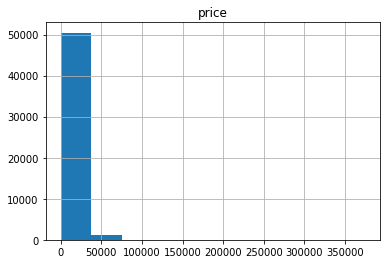

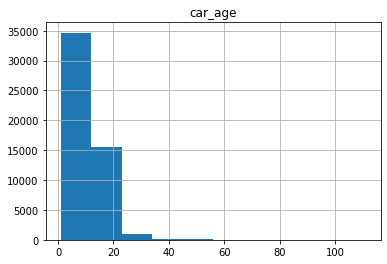

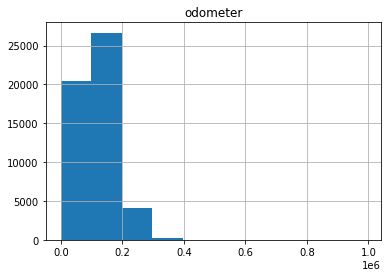

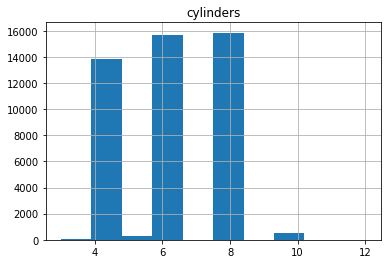

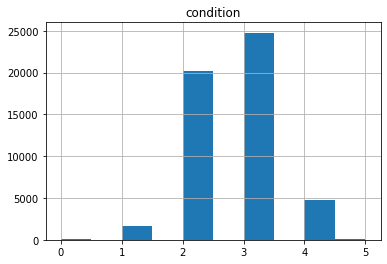

In [60]:
#criando histogramas de algumas colunas para análise:

hist_cols = ['price', 'car_age', 'odometer', 'cylinders', 'condition']

for col in hist_cols:
    df.hist(column=[col])
    plt.show()

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

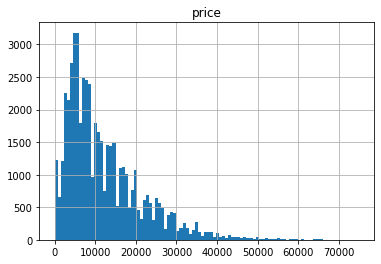

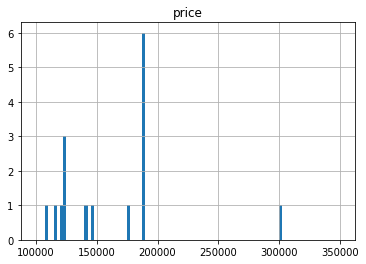

In [61]:
# no primeiro histograma de price podemos observar que a grande maioria dos veiculos está na faixa de 
#preço até 50000 com alguns valores até 75000, e acima disso até 350000 são pouquissimos valores em relação ao total.
#vamos criar um novo histograma apenas com os carros de até 75000.
df.hist('price', bins=100, range=(0, 75000))
#a maior parte dos carros custa até 10000

#vamos verificar mais de perto os veiculos com valores mais altos, enre 100000 e 350000
df.hist('price', bins=100, range=(100000, 350000))
#nessa faixa de preço a maioria dos veiculos custa até 200000

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

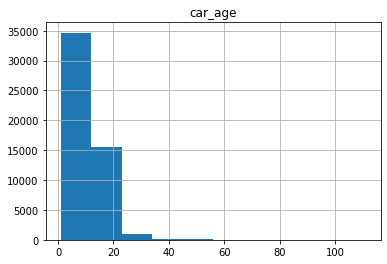

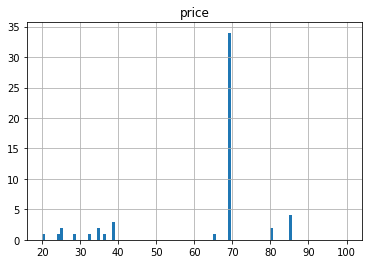

In [62]:
df.hist(['car_age'])

#no primeiro histograma podemos observar que a maioria dos veiculos tem até 20 anos, acima disso
#são poucos valores com relação ao total.

#vamos observar melhor os veiculos com mais de 20 anos 
df.hist('price', bins=100, range=(20, 100))
#dos carro mais velhos, a grande maioria está na faixa dos 70 anos

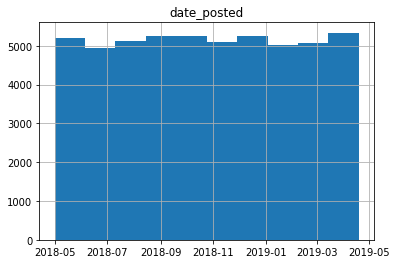

In [63]:
#em 'date_posted' temos uma distribuição equilibrada entre as datas.
df.hist('date_posted');



array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

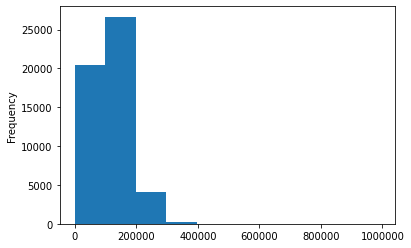

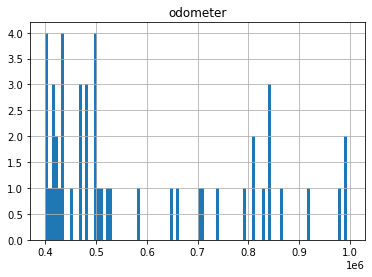

In [64]:
#no primeiro histograma de 'odometer' vemos que a maioria dos veiculos ja rodou até 200000km
#com alguns valores aparecendo até 400000
df['odometer'].plot(kind='hist').ticklabel_format(style='plain', axis='x') #utilizando esse metodo para nao aparecer em notação cientifica

#vamos analisar os veiculos que ja rodaram acima de 400000
df.hist('odometer', bins=100, range=(400000, 1000000))

Com base nos histogramas acima, iremos definir os limites inferior e superior para os valores atipicos



## Estude e cuide dos valores atípicos


In [65]:
#vamos usar os valores de referencia abaixo para calcular os limites inferior e superior da colunas
#quartil 1, quartil 3 e distancia interquartil.
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
iqr = q3 - q1

In [66]:
# Determine o limite inferior para valores atípicos em 'price'
price_lim_inf = q1 - 1.5*iqr
price_lim_inf

-12758.5

In [67]:
#como é um valor abaixo de zero, iremos limitar esse limite inferior a 1
price_lim_inf = max(price_lim_inf, df['price'].min())
price_lim_inf

1

In [68]:
# Determine o limite superior para valores atípicos em 'price'
price_lim_sup = q3 + 1.5*iqr
price_lim_sup

34597.5

In [69]:
# Armazene os dados sem os valores atípicos em um DataFrame separado
df_price = df.loc[(df['price'] > price_lim_inf) & (df['price'] < price_lim_sup), :]

Agora vamos fazer o mesmo com a coluna 'car_age'

In [70]:
q1 = df['car_age'].quantile(0.25)
q3 = df['car_age'].quantile(0.75)
iqr = q3 - q1

# Determine o limite inferior para valores atípicos em 'car_age'
car_age_lim_inf = q1 - 1.5*iqr
car_age_lim_inf

-7.0

In [71]:
#como é um valor abaixo de zero, iremos limitar esse limite inferior a 1
car_age_lim_inf = max(car_age_lim_inf, df['car_age'].min())
car_age_lim_inf

1

In [72]:
# Determine o limite superior para valores atípicos em 'car_age'
car_age_lim_sup = q3 + 1.5*iqr
car_age_lim_sup

25.0

In [73]:
# Armazene os dados sem os valores atípicos de car_age em um DataFrame separado
df_car_age = df.loc[(df['car_age'] > car_age_lim_inf) & (df['car_age'] < car_age_lim_sup), :]

Agora faremos o mesmo para 'date_posted'

In [74]:
q1 = df['date_posted'].quantile(0.25)
q3 = df['date_posted'].quantile(0.75)
iqr = q3 - q1

# Determine o limite inferior para valores atípicos em 'date_posted'
date_posted_lim_inf = q1 - 1.5*iqr
date_posted_lim_inf

Timestamp('2017-11-07 00:00:00')

In [75]:
# Determine o limite superior para valores atípicos em 'date_posted'
date_posted_lim_sup = q3 + 1.5*iqr
date_posted_lim_sup

Timestamp('2019-10-12 00:00:00')

In [76]:
# Armazene os dados sem os valores atípicos de date_posted em um DataFrame separado
df_date_posted = df.loc[(df['date_posted'] > date_posted_lim_inf) & (df['date_posted'] < date_posted_lim_sup), :]

Agora faremos o mesmo em 'odometer'

In [77]:
q1 = df['odometer'].quantile(0.25)
q3 = df['odometer'].quantile(0.75)
iqr = q3 - q1

# Determine o limite inferior para valores atípicos em 'odometer'
odometer_lim_inf = q1 - 1.5*iqr
odometer_lim_inf

-49709.5

In [78]:
#como é um valor abaixo de zero, iremos limitar esse limite inferior a 0
odometer_lim_inf = max(odometer_lim_inf, df['odometer'].min())
odometer_lim_inf

0.0

In [79]:
# Determine o limite superior para valores atípicos em 'odometer'
odometer_lim_sup = q3 + 1.5*iqr
odometer_lim_sup

274974.5

In [80]:
# Armazene os dados sem os valores atípicos de car_age em um DataFrame separado
df_odometer = df.loc[(df['odometer'] > odometer_lim_inf) & (df['odometer'] < odometer_lim_sup), :]

## Estude os parâmetros fundamentais sem valores atípicos

array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

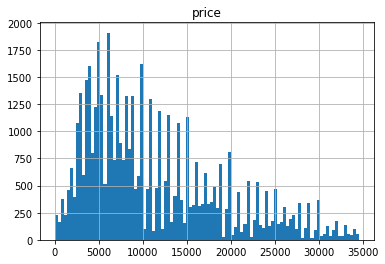

In [81]:
#criando histograma para a coluna 'price' sem os valores atípicos
df_price.hist('price', bins=100)

#temos agora uma distribuição bem mais variada na coluna, mas ainda com maior concentração entre 0 e 10000

array([[<AxesSubplot:title={'center':'car_age'}>]], dtype=object)

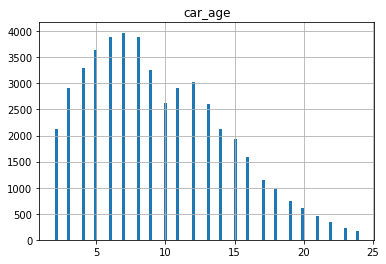

In [82]:
#criando histograma para a coluna 'price' sem os valores atípicos
df_car_age.hist('car_age', bins=100)

#o novo histograma mostra que a idade predominante dos veiculos é de 5 a 10 anos.

array([[<AxesSubplot:title={'center':'date_posted'}>]], dtype=object)

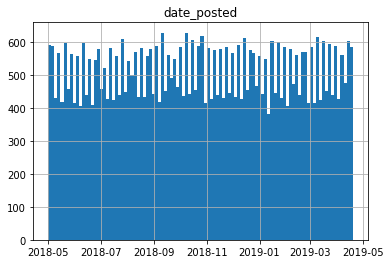

In [83]:
#criando histograma para a coluna 'date_posted' sem os valores atípicos
df_date_posted.hist('date_posted', bins=100)

#a distribuição do novo histograma não difere muito do primeiro, o que mostra que não existiam muitos valores atipicos


array([[<AxesSubplot:title={'center':'odometer'}>]], dtype=object)

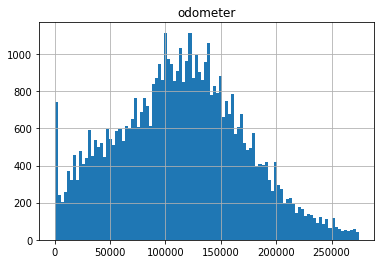

In [84]:
#criando histograma para a coluna 'odometer' sem os valores atípicos
df_odometer.hist('odometer', bins=100)

#vemos agora que existe um numero alto de carros 0km, mas a maior concentração está entre 100000 e 140000.

## Tempo de vida das propagandas

Abaixo podemos ver que:

- a média de dias que as propagandas foram exibidas é 39.55 dias
- a mediana de dias é 33 dias
- o tempo de vida útil comum das propagandas está entre 19 e 53 dias
- o tempo minimo é 0, nenhum dia
- o tempo máximo é 271 dias


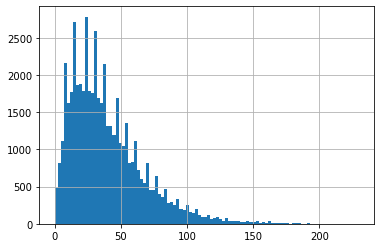

In [85]:
#criando histograma para a coluna 'days_listed
df['days_listed'].hist(bins=100, range=(0, 230));

Podemos observar que a grande maioria das propagandas ficaram ativas entre 10 e 40 dias

In [86]:
df['days_listed'].describe()

count    51525.00000
mean        39.55476
std         28.20427
min          0.00000
25%         19.00000
50%         33.00000
75%         53.00000
max        271.00000
Name: days_listed, dtype: float64

In [87]:
#filtrando somente propagandas que foram tiradas rapidamente com menos de 19 dias 

df.query('days_listed < 19')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,median_year,median_km,posted_day,posted_dayofweek,posted_month,posted_year,car_age,km_avg
3,1500,2003,ford f-150,1,8.0,gas,177500.0,automatic,pickup,white,...,2019-03-22,9,2001.0,177500.0,22,4,3,2019,17,10441.176471
5,14990,2014,chrysler 300,3,6.0,gas,57954.0,automatic,sedan,black,...,2018-06-20,15,2012.0,88095.0,20,2,6,2018,5,11590.800000
9,9200,2008,honda pilot,3,NaN,gas,147191.0,automatic,SUV,blue,...,2019-02-15,17,2010.0,148182.0,15,4,2,2019,12,12265.916667
16,14990,2010,ram 1500,3,8.0,gas,130725.0,automatic,pickup,red,...,2018-12-30,13,2013.0,124326.0,30,6,12,2018,9,14525.000000
18,12500,2013,chevrolet traverse,3,6.0,gas,128325.0,automatic,SUV,white,...,2019-04-09,13,2012.0,135981.0,9,1,4,2019,7,18332.142857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51504,20481,2018,toyota camry,4,4.0,gas,38590.0,automatic,sedan,silver,...,2018-12-06,4,2012.0,32284.5,6,3,12,2018,1,38590.000000
51505,2000,2000,ford f150,2,6.0,gas,122000.0,automatic,truck,white,...,2019-01-22,15,2006.0,122000.0,22,1,1,2019,20,6100.000000
51509,5980,2010,subaru impreza,3,4.0,gas,121778.0,manual,hatchback,white,...,2019-01-10,8,2011.0,125272.5,10,3,1,2019,10,12177.800000
51513,17999,2014,ram 1500,4,8.0,gas,154000.0,automatic,pickup,white,...,2018-06-21,11,2015.0,94000.0,21,3,6,2018,5,30800.000000


acima podemos ver que tiveram um total de 12561 propagando que foram retiradas mais rapido do que o normal
com menos de 19 dias.

In [88]:
#filtrando somente propagandas que foram tiradas depois de um tempo anormalmente longe, mais de 53 dias 

df.query('days_listed > 53')

,price,model_year,model,condition,cylinders,fuel,odometer,transmission,type,paint_color,...,date_posted,days_listed,median_year,median_km,posted_day,posted_dayofweek,posted_month,posted_year,car_age,km_avg
2,5500,2013,hyundai sonata,4,4.0,gas,110000.0,automatic,sedan,red,...,2019-02-07,79,2014.0,108489.5,7,3,2,2019,7,15714.285714
6,12990,2015,toyota camry,3,4.0,gas,79212.0,automatic,sedan,white,...,2018-12-27,73,2010.0,70000.0,27,3,12,2018,4,19803.000000
7,15990,2013,honda pilot,3,6.0,gas,109473.0,automatic,SUV,black,...,2019-01-07,68,2010.0,118698.0,7,0,1,2019,7,15639.000000
15,17990,2013,ram 1500,3,8.0,gas,96100.0,automatic,pickup,red,...,2018-05-15,111,2013.0,96100.0,15,1,5,2018,6,16016.666667
22,7500,2004,chevrolet silverado,4,8.0,gas,180000.0,automatic,truck,red,...,2019-01-05,64,2015.0,174750.0,5,5,1,2019,16,11250.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51503,6595,2011,chevrolet malibu,3,4.0,gas,100780.0,automatic,sedan,white,...,2019-02-27,73,2013.0,101870.5,27,2,2,2019,9,11197.777778
51512,7300,2013,nissan altima,3,6.0,gas,7100.0,automatic,sedan,black,...,2018-06-17,63,2013.0,100986.0,17,6,6,2018,6,1183.333333
51518,3750,2005,ford taurus,3,6.0,gas,110200.0,automatic,sedan,silver,...,2018-08-10,63,2010.0,125000.0,10,4,8,2018,14,7871.428571
51519,11750,2015,honda accord,3,4.0,gas,59815.0,automatic,coupe,white,...,2018-11-24,89,2010.0,59815.0,24,5,11,2018,4,14953.750000


Acima vemos que tiveram 12807 propagandas que ficaram ativas mais tempo que a maioria,
com mais de 53 dias

## Média de preços por cada tipo de veículo

In [89]:
#número de propagandas com o preço médio do veículo por tipo de veículo

df_aux = df.groupby('type').agg({'model': 'count', 'price': 'mean'})\
    .reset_index().rename(columns={'model': 'count', 'price': 'avg price'})\
    .sort_values(by=['count'], ascending=False)

df_aux.head(10)

,type,count,avg price
0,SUV,12405,11149.400000
10,truck,12353,16734.894924
9,sedan,12154,6965.358647
8,pickup,6988,16057.410418
3,coupe,2303,14353.442901
12,wagon,1541,9088.134328
5,mini-van,1161,8193.177433
4,hatchback,1047,6868.513849
11,van,633,10546.941548
2,convertible,446,14575.881166


<AxesSubplot:ylabel='type'>

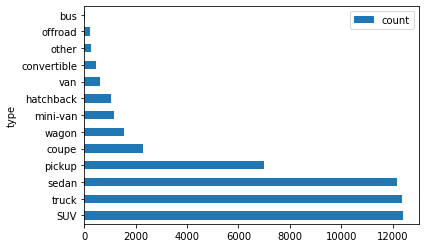

In [90]:
df_aux.plot.barh(y='count', x='type')

Os dois tipos com maior número de propagandas são SUV e truck (caminhão)

## Fatores de preço

No gráfico abaixo vemos a correlação entre o preço e a idade do veículo
podemos ver que a relação com a alta do preço esta em algumas idades, sem nenhum padrão visivel
acredito que existam determinados modelos de 20 anos que sejam vistos como especiais, colecionaveis, por isso da alta nos preços.

<AxesSubplot:xlabel='car_age', ylabel='price'>

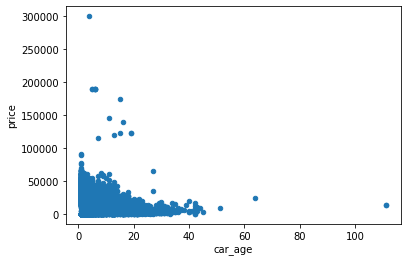

In [91]:
df[df['type'].isin(['SUV', 'truck'])].plot.scatter(x='car_age', y='price')

No gráfico abaixo vemos a correlação entre a quilometragem e o preço do veículo
podemos observar que dos 0km pra frente o preço tende a cair, com exceção de alguns picos no gráfico que
creio que devem ser modelos especiais, de luxo, colecionaveis etc

<AxesSubplot:xlabel='odometer', ylabel='price'>

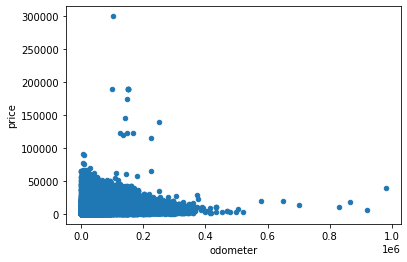

In [92]:
df[df['type'].isin(['SUV', 'truck'])].plot.scatter(x='odometer', y='price')

<AxesSubplot:xlabel='km_avg', ylabel='price'>

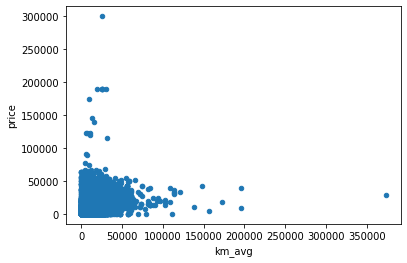

In [93]:
#Abaixo vemos um gráfico do preço com relação a media de km rodados por ano.
df[df['type'].isin(['SUV', 'truck'])].plot.scatter(x='km_avg', y='price')


Abaixo vemos o grafico da relação entre a condição e o preço do veículo

podemos ver que quanto melhor a condição do veículo, o preço tende a ser maior. e temos alguns picos em carros usados, que provavelmente são especiais.

<AxesSubplot:xlabel='condition', ylabel='price'>

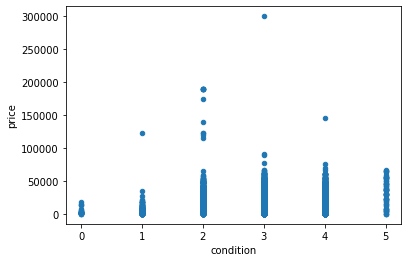

In [94]:
df[df['type'].isin(['SUV', 'truck'])].plot.scatter(x='condition', y='price')

Abaixo podemos ver a relação entre o preço e o tipo de transmissão do veículo, claramente é notável
que carros com transmissão automática tendem a ser mais caros.

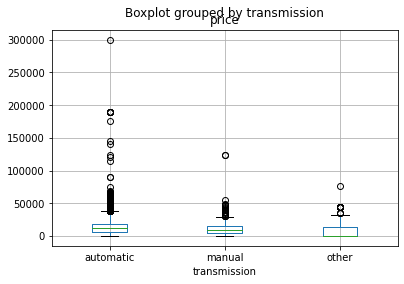

In [99]:
df[df['type'].isin(['SUV', 'truck'])].boxplot('price', by='transmission', );

Abaixo vemos o gráfico da relação entre a cor do veículo e o preço
podemos observar que existem cores que tendem a ser mais caras, como preto, branco, prata, vermelho
e a mais cara Cinza.

enquanto as cores mais baratas são amarelo, roxo, laranja, verde e as demais.

(0.0, 150000.0)

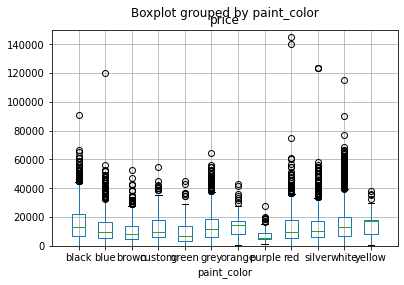

In [100]:
df[df['type'].isin(['SUV', 'truck'])].boxplot('price', by='paint_color');
plt.xlim(0, 13)
plt.ylim(0, 150000)


## Conclusão geral


Começamos tratando os valores ausentes e verificando duplicatas
depois alteramos o tipo dos dados quando foi necessário. Categorizamos os dados por condição do veículo. 

Depois criamos gráficos para fazer a análise, estipulamos valores minimos e máximos para cada coluna e analisamos novamente

Criamos gráficos de correlação para entender como funciona a mudança dos preços.

descobrimos também que os tipos de veículos mais vendidos são os SUV e TRUCK (caminhão)

Vimos que o preço dos veículos tende a ser mais alto quanto menor a idade.
Carros com transmissão automática são mais caros.
Na maioria das vezes quanto maior a quilometragem, mais barato vai ficando o carro.
A cor do veículo influencia muito no valor, algumas cores são bem mais baratas que as outras.